## Loading Data from the Dev GeoDB

The Database is hosted at AWS as an RDS service:

- Hostname: db-dcfs-geodb.cbfjgqxk302m.eu-central-1.rds.amazonaws.com
- Port: 5432
- Database postgres
- User: postres
- PostGIS initialised with: ```CREATE EXTENSION postgis```

Schema of the GeoDB:

```sql
CREATE TABLE "public"."land_use" (
    "id" integer DEFAULT nextval('land_user_id_seq') NOT NULL,
    "raba_id" integer NOT NULL,
    "d_od" date NOT NULL,
    "geometry" geometry NOT NULL,
    "raba_pid" double precision NOT NULL
) WITH (oids = false);
```



### Load Data using the convenience function _load_geodb_

__step 1__: Import the function and the default connection parameters to set the password

In [2]:
from dcfs_geodb import GeoDB
from dcfs_geodb import PG_DEFAULT_CONNECTION_PARAMETERS

__step 2__:

Set the password. It is also possible to set the password as an environment variable (_PG_GEODB_PASSWORD_)


In [3]:
PG_DEFAULT_CONNECTION_PARAMETERS['password'] = "Oeckel6b&z"
geodb = GeoDB(con=PG_DEFAULT_CONNECTION_PARAMETERS)

__step 3__: Load (all) data

It is possible to pass an sql statement. _load_geodb_ also accepts a _psycopg2_ connection. If ```con``` is None, teh DEFAULT will be used but you will require 
the password to be set as an environment variable.

_DEFAULT_LOAD_SQL_:

```sql
SELECT raba_pid, raba_id, d_od, geometry FROM land_use
```

In [56]:
gdfall = geodb.load()

In [57]:
gdfall

,raba_pid,raba_id,d_od,geometry
0,4770326.0,1410,2019-03-26,"POLYGON ((453952.629 91124.177, 453952.696 911..."
1,4770325.0,1300,2019-03-26,"POLYGON ((453810.376 91150.19899999999, 453812..."
2,2305689.0,7000,2019-02-25,"POLYGON ((456099.635 97696.07000000001, 456112..."
3,2305596.0,1100,2019-02-25,"POLYGON ((455929.405 97963.785, 455933.284 979..."
4,2310160.0,1100,2019-03-11,"POLYGON ((461561.512 96119.25599999999, 461632..."
...,...,...,...,...
9825,6245986.0,2000,2019-02-20,"POLYGON ((459676.68 94000, 459672.469 93981.44..."
9826,6245987.0,2000,2019-03-11,"POLYGON ((459690.58 94042.607, 459686.872 9403..."
9827,1.0,1,2019-01-01,"POLYGON ((453913.121 91114.22500000001, 453913..."
9828,6245985.0,2000,2019-01-01,"POLYGON ((453913.121 91114.22500000001, 453913..."


In [59]:
minx, miny, maxx, maxy = gdfall.total_bounds

print(minx, miny, maxx, maxy)

p = f"POLYGON(({minx} {miny},{minx} {maxy},{maxx} {maxy},{maxx} {miny},{minx} {miny}))"
p


452750.0 88909.549 464000.0 102486.299


'POLYGON((452750.0 88909.549,452750.0 102486.299,464000.0 102486.299,464000.0 88909.549,452750.0 88909.549))'

In [ ]:
POLYGON((458199.608 93099.296,458199.825 93092.132,458192.661 93092.132,458192.769 93099.188,458199.608 93099.296))

__Step 4__: explore the data

In [40]:
geodb.delete(sql="DELETE FROM land_use WHERE raba_id=1")

Deleted entries using: DELETE FROM land_use WHERE raba_id=1


Plot the polygons:

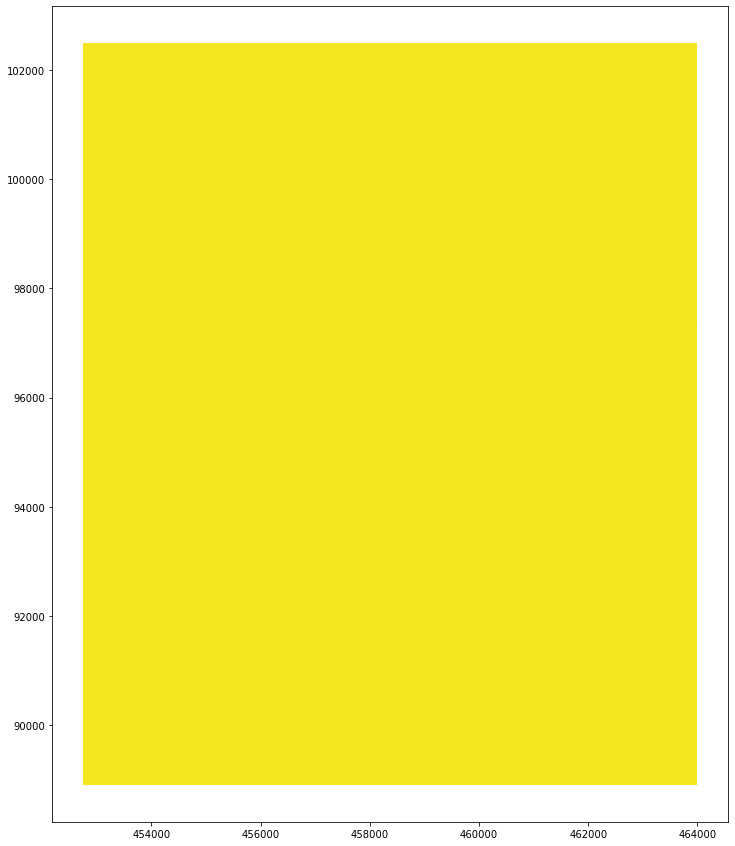

In [58]:
gdfall.plot(column="raba_pid", figsize=(15,15))

Subselect the data. Here: Select the first row

In [49]:
sql = "SELECT raba_pid, raba_id, d_od, geometry FROM land_use  WHERE raba_id=1"
gdfone = geodb.load(sql=sql)

In [51]:
gdfone

,raba_pid,raba_id,d_od,geometry
0,1.0,1,2019-01-01,"POLYGON ((453913.121 91114.22500000001, 453913..."


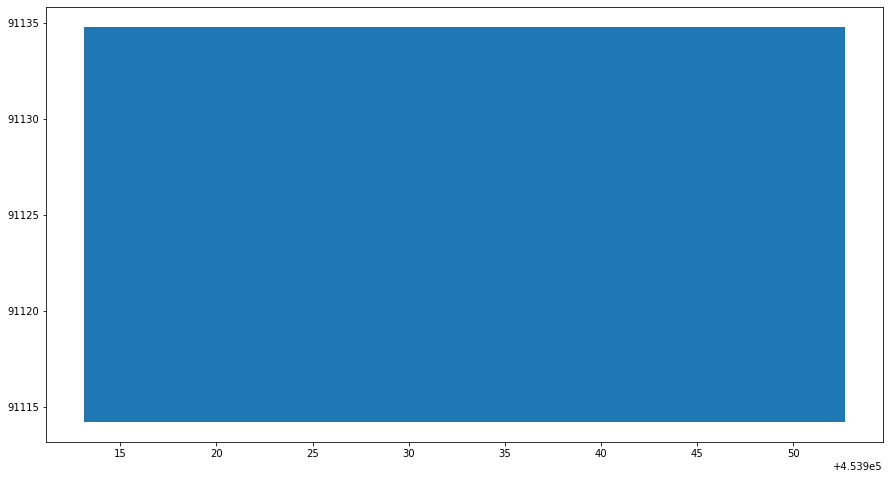

In [50]:
gdfone.geometry.plot(figsize=(15,15))

In [5]:
geodb.query()

[(9827,)]